**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [2]:
data=pd.read_csv("Miles_Traveled.csv ", index_col='DATE', parse_dates=True)
data.index.freq = 'MS'

In [3]:
data.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [4]:
data.columns = ['value']

In [5]:
data.head()

,value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**TASK: Plot out the time series**

<AxesSubplot:xlabel='DATE'>

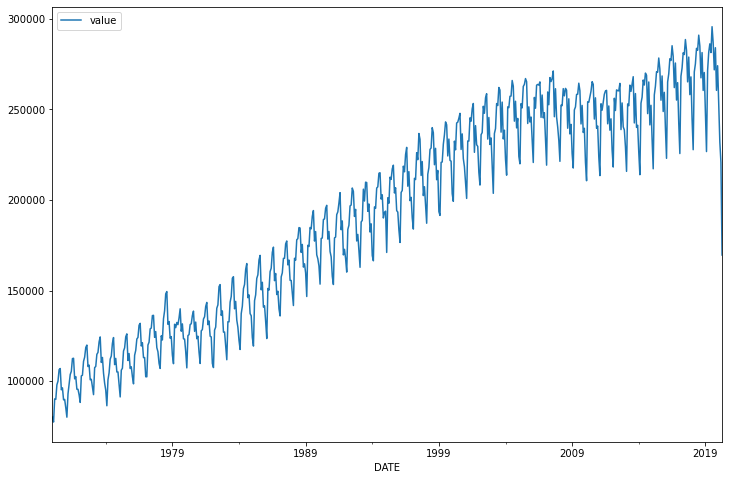

In [6]:
data.plot(figsize=(12,8))

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<AxesSubplot:xlabel='DATE'>

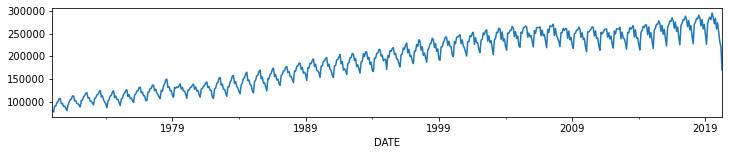

In [8]:
results = seasonal_decompose(data['value'])
results.observed.plot(figsize=(12,2))

<AxesSubplot:xlabel='DATE'>

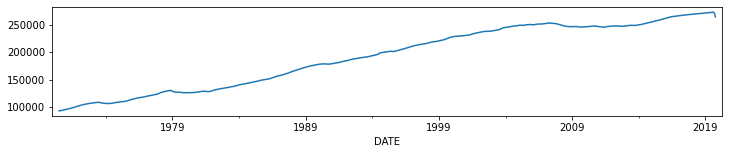

In [9]:
results.trend.plot(figsize=(12,2))

<AxesSubplot:xlabel='DATE'>

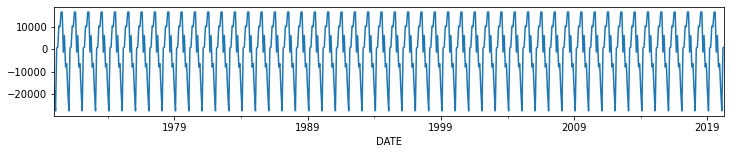

In [10]:
results.seasonal.plot(figsize=(12,2))

<AxesSubplot:xlabel='DATE'>

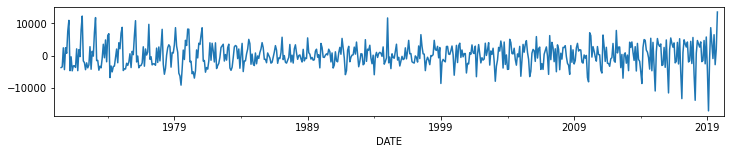

In [11]:
results.resid.plot(figsize=(12,2))

## Train Test Split

**TASK: Figure out the length of the data set**

In [12]:
len(data)

604

In [13]:
604-16

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [14]:
train = data.iloc[:588]
test = data.iloc[588:]

In [15]:
len(test)

16

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
scaled_train

array([[0.01278875],
       [0.        ],
       [0.05985099],
       [0.05860068],
       [0.09613809],
       [0.10579872],
       [0.13556735],
       [0.13826933],
       [0.08341021],
       [0.08838804],
       [0.05732696],
       [0.05838996],
       [0.0369661 ],
       [0.0125312 ],
       [0.0727334 ],
       [0.09676558],
       [0.1227505 ],
       [0.13107653],
       [0.16401073],
       [0.16483491],
       [0.11167565],
       [0.11745892],
       [0.08481974],
       [0.08463242],
       [0.07034985],
       [0.05071483],
       [0.11933673],
       [0.12079776],
       [0.15688818],
       [0.1677523 ],
       [0.19270699],
       [0.19888362],
       [0.14343447],
       [0.14703555],
       [0.10933893],
       [0.11050495],
       [0.09001297],
       [0.0708275 ],
       [0.14070907],
       [0.14365924],
       [0.17502938],
       [0.17989951],
       [0.20718156],
       [0.22001714],
       [0.15401762],
       [0.16692812],
       [0.12615022],
       [0.100

In [22]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [23]:
len(scaled_train)

588

In [24]:
len(generator)

586

In [25]:
scaled_train

array([[0.01278875],
       [0.        ],
       [0.05985099],
       [0.05860068],
       [0.09613809],
       [0.10579872],
       [0.13556735],
       [0.13826933],
       [0.08341021],
       [0.08838804],
       [0.05732696],
       [0.05838996],
       [0.0369661 ],
       [0.0125312 ],
       [0.0727334 ],
       [0.09676558],
       [0.1227505 ],
       [0.13107653],
       [0.16401073],
       [0.16483491],
       [0.11167565],
       [0.11745892],
       [0.08481974],
       [0.08463242],
       [0.07034985],
       [0.05071483],
       [0.11933673],
       [0.12079776],
       [0.15688818],
       [0.1677523 ],
       [0.19270699],
       [0.19888362],
       [0.14343447],
       [0.14703555],
       [0.10933893],
       [0.11050495],
       [0.09001297],
       [0.0708275 ],
       [0.14070907],
       [0.14365924],
       [0.17502938],
       [0.17989951],
       [0.20718156],
       [0.22001714],
       [0.15401762],
       [0.16692812],
       [0.12615022],
       [0.100

In [26]:
X,y = generator[0]

In [27]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')


Given the Array: 
[0.01278875 0.        ]
Predict this y: 
 [[0.05985099]]


In [28]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [29]:
X,y = generator[0]

In [30]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01278875 0.         0.05985099 0.05860068 0.09613809 0.10579872
 0.13556735 0.13826933 0.08341021 0.08838804 0.05732696 0.05838996]
Predict this y: 
 [[0.0369661]]


### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [32]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [34]:
%%time
# fit model
model.fit_generator(generator,epochs=50)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
576/576 [==============================] - 3s 4ms/step - loss: 0.0151
Epoch 2/50
576/576 [==============================] - 2s 4ms/step - loss: 0.0053
Epoch 3/50
576/576 [==============================] - 2s 4ms/step - loss: 0.0040
Epoch 4/50
576/576 [==============================] - 2s 4ms/step - loss: 0.0030
Epoch 5/50
576/576 [==============================] - 3s 5ms/step - loss: 0.0027
Epoch 6/50
576/576 [==============================] - 2s 4ms/step - loss: 0.0024
Epoch 7/50
576/576 [==============================] - 2s 4ms/step - loss: 0.0019
Epoch 8/50
576/576 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 9/50
576/576 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 10/50
576/576 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 11/50
576/576 [==============================] - 3s 4ms/step - loss: 0.0011
Epoch 12/50
576/576 [==========

**TASK: Plot the history of the loss that occured during training.**

In [35]:
model.history.history.keys()

dict_keys(['loss'])

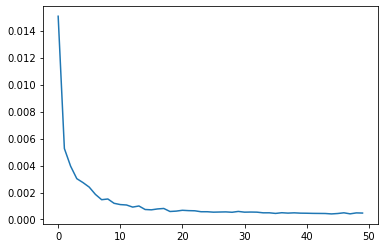

In [36]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [37]:
first_eval_batch = scaled_train[-12:]

In [38]:
first_eval_batch

array([[0.78340599],
       [0.70390593],
       [0.90501388],
       [0.92572127],
       [0.96592788],
       [0.96094068],
       [1.        ],
       [0.97190314],
       [0.88969641],
       [0.95501225],
       [0.85709937],
       [0.90344514]])

In [39]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

**TASK: Generate predictions into the same time stamps as the test set**

In [40]:
model.predict(first_eval_batch)

array([[0.8145201]], dtype=float32)

In [41]:
scaled_test[0]

array([0.79993163])

In [42]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [43]:
current_batch.shape

(1, 12, 1)

In [44]:
current_batch

array([[[0.78340599],
        [0.70390593],
        [0.90501388],
        [0.92572127],
        [0.96592788],
        [0.96094068],
        [1.        ],
        [0.97190314],
        [0.88969641],
        [0.95501225],
        [0.85709937],
        [0.90344514]]])

In [45]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.70390593],
        [ 0.90501388],
        [ 0.92572127],
        [ 0.96592788],
        [ 0.96094068],
        [ 1.        ],
        [ 0.97190314],
        [ 0.88969641],
        [ 0.95501225],
        [ 0.85709937],
        [ 0.90344514],
        [99.        ]]])

In [46]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [47]:
test_predictions

[array([0.8145201], dtype=float32),
 array([0.7465621], dtype=float32),
 array([0.92984426], dtype=float32),
 array([0.9550873], dtype=float32),
 array([1.0013753], dtype=float32),
 array([0.9949056], dtype=float32),
 array([1.0326661], dtype=float32),
 array([1.0017182], dtype=float32),
 array([0.928159], dtype=float32),
 array([0.9822377], dtype=float32),
 array([0.89078593], dtype=float32),
 array([0.93344533], dtype=float32),
 array([0.8453373], dtype=float32),
 array([0.7876327], dtype=float32),
 array([0.95467985], dtype=float32),
 array([0.98394156], dtype=float32)]

In [48]:
scaled_test

array([[0.79993163],
       [0.69911542],
       [0.90905515],
       [0.95587388],
       [0.97756934],
       [0.95497947],
       [1.02189214],
       [0.98043522],
       [0.9103757 ],
       [0.9675294 ],
       [0.85725859],
       [0.92098227],
       [0.82460536],
       [0.72391558],
       [0.67099983],
       [0.43167078]])

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [49]:
true_predictions = scaler.inverse_transform(test_predictions)

In [50]:
true_predictions

array([[251380.32819819],
       [236868.10174406],
       [276007.45223629],
       [281398.02853191],
       [291282.69494188],
       [289901.10424364],
       [297964.74491274],
       [291355.90865886],
       [275647.56965041],
       [287195.91340601],
       [267666.66353631],
       [276776.45083249],
       [257961.23835766],
       [245638.60099435],
       [281311.01723683],
       [287559.76725054]])

In [51]:
test

,value
DATE,
2019-01-01,248265.0
2019-02-01,226736.0
2019-03-01,271568.0
2019-04-01,281566.0
2019-05-01,286199.0
2019-06-01,281375.0
2019-07-01,295664.0
2019-08-01,286811.0
2019-09-01,271850.0


**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [52]:
test['Predictions'] = true_predictions

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
test

,value,Predictions
DATE,,
2019-01-01,248265.0,251380.328198
2019-02-01,226736.0,236868.101744
2019-03-01,271568.0,276007.452236
2019-04-01,281566.0,281398.028532
2019-05-01,286199.0,291282.694942
2019-06-01,281375.0,289901.104244
2019-07-01,295664.0,297964.744913
2019-08-01,286811.0,291355.908659
2019-09-01,271850.0,275647.569650


**TASK: Plot out the test set against your own predicted values.**

<AxesSubplot:xlabel='DATE'>

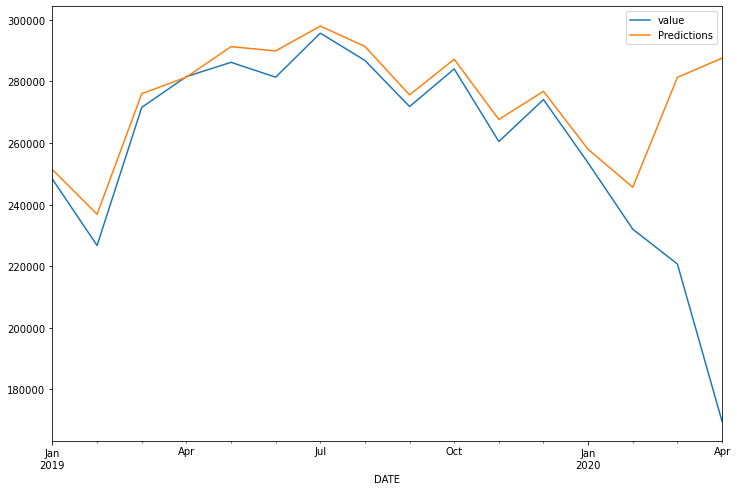

In [54]:
test.plot(figsize=(12,8))

# Saving Models

**TASK: Optional, Save your model!**

In [55]:
model.save('my_rnn_model.h5')